# 441B Homework #1

## Pregya Vijayakumar

In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.480
1947-02-01,NaN,NaN,NaN,21.620
1947-03-01,NaN,NaN,NaN,22.000
1947-04-01,NaN,NaN,NaN,22.000
1947-05-01,NaN,NaN,NaN,21.950
...,...,...,...,...
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619
2023-11-01,5.33,3.7,1560.0,307.917


In [5]:
data.dropna(inplace = True)

In [6]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [9]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [18]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:, 0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:, 0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:, 0]

In [19]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [24]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph for your model

In [17]:
import matplotlib.pyplot as plt

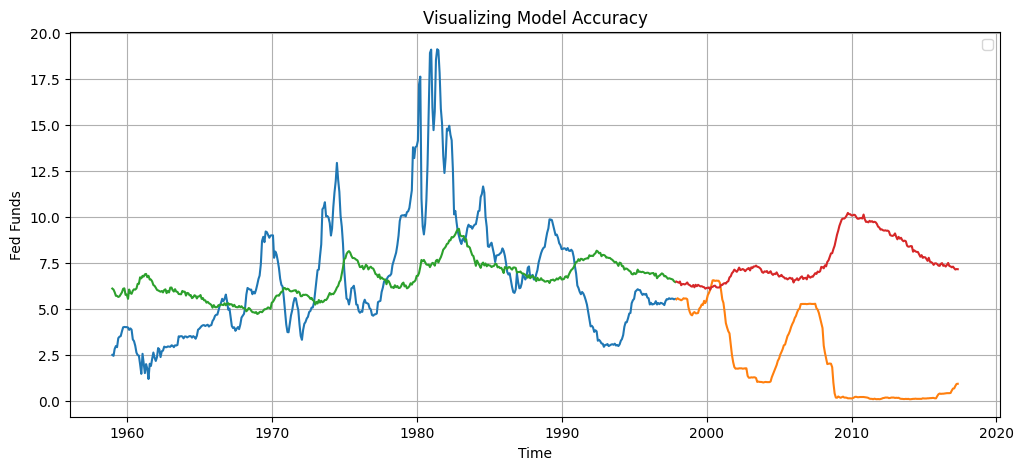

In [28]:
plt.figure(figsize = (12,5))

### In sample actual
plt.plot(y_in)

### Out of sample actual
plt.plot(y_out)


### In sample prediction
plt.plot(model1.predict(X_in))

### Out of sample prediction
plt.plot(model1.predict(X_out))

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

(Observations
1. Underfit and model not good (Data doesnt predict perfectly)
2. Fed go against what theyve done before (regime change) they were acting in predictable way but right now they arent)

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [31]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
max_degrees = 3

DEGREE : 1


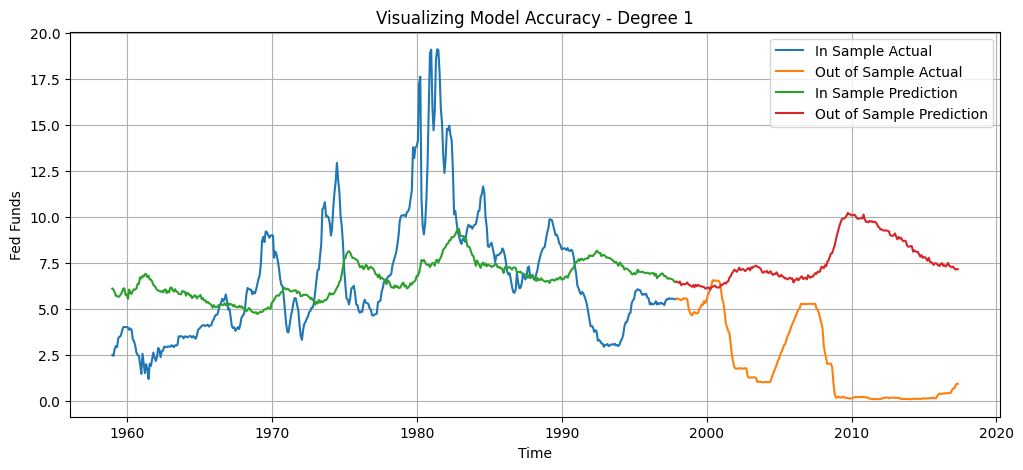

The Insample MSE is :  10.071422013168641
The Outsample MSE is :  40.36082783565204
DEGREE : 2


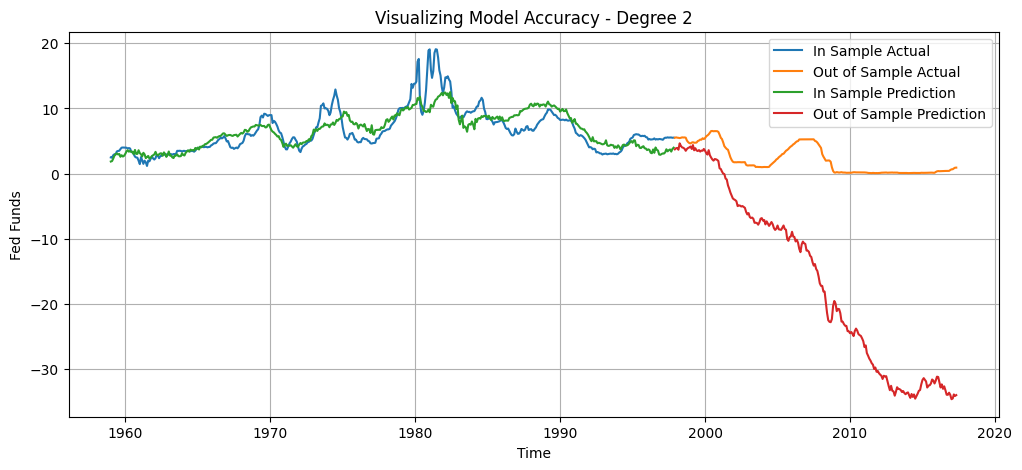

The Insample MSE is :  3.863477139276068
The Outsample MSE is :  481.4465099024405
DEGREE : 3


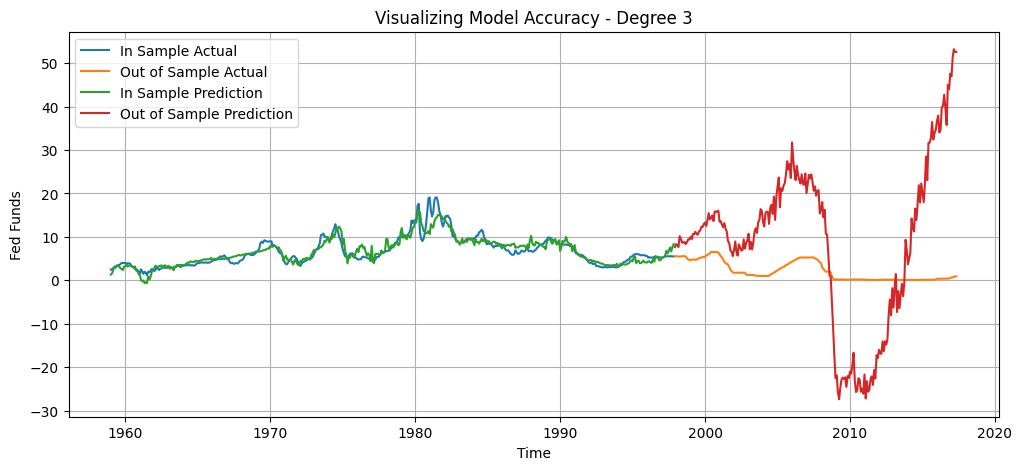

The Insample MSE is :  1.8723636288250916
The Outsample MSE is :  371.7672642959744


In [59]:
for degrees in range (1, max_degrees+1):
    print ("DEGREE :", degrees)
    
    #Creating the model and defining the polynomial features
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    model = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))
    
    pred_in = model.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    
    pred_out = model.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)
    
    # Plotting the data
    
    ### In sample actual
    plt.plot(y_in, label = "In Sample Actual")
    ### Out of sample actual
    plt.plot(y_out, label = "Out of Sample Actual")
    ### In sample prediction
    plt.plot(pred_in, label = "In Sample Prediction")
    ### Out of sample prediction
    plt.plot(pred_out, label = "Out of Sample Prediction")
    
    #Labelling the data
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title(f"Visualizing Model Accuracy - Degree {degrees}")
    plt.legend(["In Sample Actual", "Out of Sample Actual", "In Sample Prediction","Out of Sample Prediction" ])
    plt.grid()
    plt.show()
    
    #Deriving the Squared Errors
    in_mse = mean_squared_error(model.predict(X_in_poly), y_in)
    out_mse = mean_squared_error(model.predict(X_out_poly), y_out)
    
    print("The Insample MSE is : ", in_mse)
    print("The Outsample MSE is : ", out_mse)
    

# 7.) State your observations :

## Using a for loop we created the model for the polynomial degrees one two and three. For all three we can say that the models are misfit. 

## For Figure 1, Visualizing Model Accuracy - Degree 1 - 
### The In sample prediction is poorly fit. While we can also see that the Out of Sample prediction is misfit. Due to the simplicity of the model, it is not performing well on both fronts, be it the bias or the variance. It does not predict in sample values nor the out of sample ones. 

## For Figure 2, Visualizing Model Accuracy - Degree 2 - 
### The In sample predictions are relatively better and the in sample MSE goes down to 3.8 from 10.07 from the Degree 1. As we made the model a little more complex, it is handling the in sample data better, leading to a great rate of predictions for the model in the beginning but it becomes worser as time passes. The out of sample predictions are overfit. This means that the level of polynomial is not well fit for the out of sample data.  Although it fits our insample way better than the first model, the out of sample MSE increases by approximately 440. 

## For Figure 3, Visualizing Model Accuracy - Degree 3 - 
### In our final model, we can see that the the in sample predictions are extremely similar to the in sample actual. But, we see the same issue with the out of sample predictions as we did for our previous two models, it is Overfitting the out of sample predictions. This is because we are fitting the model's accuracy to the in sample data by predicting a complex model, but, we are in a way ignoring the fact that it may cause some bias for predicting the out of sample values. 


### Overall, we can say that we are overfitting in all the scenarios, even though our Out of Sample MSE goes down Scenario 3 by 110, we would still conclude with the fact that it is overfit and predicted to fit our in sample data. As we raise the level of polynomials and the complexity of the model, we are fiting increasingly to the in sample data as we can see from the reducing in sample MSE. Hence, this makes our model not a great fit for predicting the out of sample or real world data.